# Product Review Summarization

## Main Objective
The "Product Review Summarization" project aims to develop an intelligent system that can analyze and summarize product reviews from e-commerce websites. The system will leverage natural language processing (NLP) techniques, machine learning algorithms, and deep learning models to detect fake reviews, perform sentiment analysis, and generate concise summaries of genuine product reviews. This will assist consumers in making informed purchase decisions by providing them with a comprehensive understanding of product features and customer sentiments.

## User Input Product URL

1. Taking Input from user: Prompt the user to enter an Amazon product URL.
   
2. Validation Check: Check if the entered URL starts with "https://www.amazon.in" or "https://amzn.in/" to make sure it's a amazon review.
   
3. Redirection Handling: If the URL starts with "https://amzn.in/", send a request to fetch the final redirected URL using the `requests` library. To get Amazon Standard Identification Number(ASIN) in the URL.

4. Output: Ensure the URL starts with "https://www.amazon.in" by splitting it at any query parameters and printing the base URL.

This process ensures that the user-provided Amazon product URL is correctly formatted and ready for further use, handling potential redirects and verifying its validity before proceeding with operations.

In [1]:
import requests

In [2]:
input_url = input("Enter an Amazon URL: ").strip()

if input_url.startswith("https://www.amazon.in"):
    final_url = input_url
elif input_url.startswith("https://amzn.in/"):
    response = requests.get(input_url)
    final_url = response.url
else:
    print("Invalid URL format. Please enter a valid URL.")
    final_url = None
    
if final_url:
    print(final_url)
    if final_url.startswith("https://www.amazon.in"):
        url = final_url.split('?')[0]
        print(url)
    else:
        print("Invalid Amazon URL")

Enter an Amazon URL:  https://amzn.in/d/023jSYHu


https://www.amazon.in/Redmi-Startrail-Storage-MediaTek-Dimensity/dp/B0CNX6WVG5
https://www.amazon.in/Redmi-Startrail-Storage-MediaTek-Dimensity/dp/B0CNX6WVG5


## Web Scraping
Sure, here's a concise summary of the steps involved in the code snippet:

1. Fetch Reviews: Sends a request to an Amazon product reviews page and retrieves the HTML content if the request is successful.

2. Parse Reviews: Uses BeautifulSoup to extract review titles and bodies from the HTML content.

3. Scrape Amazon Reviews: Integrates fetching and parsing functions to scrape all reviews from the specified Amazon product reviews page, with a randomized delay between requests.

4. User-Agent Initialization: Sets up a random user-agent string to mimic different web browsers or devices, ensuring smoother scraping and avoiding detection.

Amazon product reviews, utilizing requests for HTTP requests and BeautifulSoup for HTML parsing. It includes mechanisms like random user-agent strings and delays between requests to handle web scraping responsibly.

In [3]:
import requests
from bs4 import BeautifulSoup
import time
import random
from fake_useragent import UserAgent

In [4]:
def fetch_reviews(url, headers):
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve page: {response.status_code}")
        return None

def parse_reviews(page_content):
    soup = BeautifulSoup(page_content, 'html.parser')
    reviews = []
    review_divs = soup.find_all('div', {'data-hook': 'review'})
    for div in review_divs:
        title = div.find('a', {'data-hook': 'review-title'}).find_all('span')[2].get_text(strip=True)
        body = div.find('span', {'data-hook': 'review-body'}).get_text(strip=True)
        reviews.append({'review_heading': title, 'review_body': body})
    return reviews

def scrape_amazon_reviews(url, headers, delay=2):
    content = fetch_reviews(url, headers)
    if not content:
        return []
    reviews = parse_reviews(content)
    time.sleep(random.uniform(delay, delay + 2))
    return reviews

ua = UserAgent()
headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36"}
url = url.replace('dp','product-reviews')
reviews = scrape_amazon_reviews(url, headers)
for review in reviews:
    print(f"Title: {review['review_heading']}")
    print(f"Body: {review['review_body']}\n")

Title: Very nice product
Body: Nice product at affordable price reslly liked it

Title: Look wise decent phone
Body: Till now It is working fine without any lags.But Charging is bit slow as compared to my old phone. Camera is good.

Title: Good performance + smooth 5g experience
Body: Performance is good and i really likes it apperance it looks cool . Budget 5g phone

Title: Quality not good
Body: Camera Quality - Very PoorBattery life - PoorJust purchased 2 months before and its getting hanged like hell.I am felling regret to purchase this device.

Title: Redmi 13c 5G honest review
Body: Battery life is too good, value for money, performance is superb , ease of use the device, no Lang issue and sound quality also good but sometimes is louder...

Title: Waste of money
Body: Slow charging and camera is not per specifications.

Title: Good
Body: Good product

Title: Best Budget phone
Body: Phone battery, appearance and sound quality deserve 5 star for this budget range category.Camera qu

## Dataset
Converting those web scrap reviews to a Dataframe.

In [5]:
import pandas as pd

In [6]:
data = pd.DataFrame(reviews)
data

review_heading  \
0                        Very nice product   
1                   Look wise decent phone   
2  Good performance + smooth 5g experience   
3                         Quality not good   
4               Redmi 13c 5G honest review   
5                           Waste of money   
6                                     Good   
7                        Best Budget phone   
8                                 Good one   
9                         Ok in this range   

                                         review_body  
0   Nice product at affordable price reslly liked it  
1  Till now It is working fine without any lags.B...  
2  Performance is good and i really likes it appe...  
3  Camera Quality - Very PoorBattery life - PoorJ...  
4  Battery life is too good, value for money, per...  
5  Slow charging and camera is not per specificat...  
6                                       Good product  
7  Phone battery, appearance and sound quality de...  
8                                        Nice phone.  
9                                   Ok in this range

## Data Preprocessing
Combinig review head and review body into single long text.

In [7]:
data['review_text'] = data['review_heading'] + ' ' + data['review_body']
data = data.drop(columns=['review_heading','review_body'])
data

review_text
0  Very nice product Nice product at affordable p...
1  Look wise decent phone Till now It is working ...
2  Good performance + smooth 5g experience Perfor...
3  Quality not good Camera Quality - Very PoorBat...
4  Redmi 13c 5G honest review Battery life is too...
5  Waste of money Slow charging and camera is not...
6                                  Good Good product
7  Best Budget phone Phone battery, appearance an...
8                               Good one Nice phone.
9                  Ok in this range Ok in this range

In [8]:
data.isnull().sum()

review_text    0
dtype: int64

## Data Cleaning
1. Import Libraries: `string` for string operations, `nltk` for natural language processing.

2. Initialize Lemmatizer: Create a `WordNetLemmatizer` object.

3. Define Cleaning Function: Convert review text to lowercase, remove punctuation and digits, remove stop words, lemmatize remaining words.

4. Apply Cleaning Function: Apply the `clean` function to the reviews column in the `data` DataFrame. Store results in a new column `cleaned_review`.

We cleans the text data for further analysis or processing.

In [9]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [10]:
def clean(review):
    review = review.lower()
    review = review.translate(str.maketrans('', '', string.punctuation))
    review = ''.join([i for i in review if not i.isdigit()])
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(review)
    cleaned_review = ' '.join([lemmatizer.lemmatize(word) for word in words if word not in stop_words])
    return cleaned_review

data['cleaned_review'] = data['review_text'].apply(clean)
data[['review_text', 'cleaned_review']].head()

review_text  \
0  Very nice product Nice product at affordable p...   
1  Look wise decent phone Till now It is working ...   
2  Good performance + smooth 5g experience Perfor...   
3  Quality not good Camera Quality - Very PoorBat...   
4  Redmi 13c 5G honest review Battery life is too...   

                                      cleaned_review  
0  nice product nice product affordable price res...  
1  look wise decent phone till working fine witho...  
2  good performance smooth g experience performan...  
3  quality good camera quality poorbattery life p...  
4  redmi c g honest review battery life good valu...

## Fake Review Detection

- Tokenize Review.
- Check Conditions:
  - If the review has fewer than 5 words, return label `1`.
  - If the ratio of unique words to total words is less than 0.5, return label `2`.
  - If the review contains promotional keywords, return label `3`.
  - If more than 10% of the words are first person pronouns, return label `4`.
- Default Label: If none of the conditions are met, return label `0`.

In [11]:
from nltk.tokenize import word_tokenize

In [12]:
def heuristic_label(review):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(review)

    if len(words) < 5:
        return 1

    if len(set(words)) / len(words) < 0.5:
        return 2

    promotional_keywords = ['buy', 'discount', 'offer', 'sale', 'amazing', 'cheap', 'best']
    if any(keyword in words for keyword in promotional_keywords):
        return 3

    first_person_pronouns = ['i', 'me', 'my', 'mine', 'we', 'us', 'our', 'ours']
    if len([word for word in words if word in first_person_pronouns]) / len(words) > 0.1:
        return 4

    return 0

data['is_fake'] = data['cleaned_review'].apply(heuristic_label)
data[['review_text', 'cleaned_review', 'is_fake']].head()

review_text  \
0  Very nice product Nice product at affordable p...   
1  Look wise decent phone Till now It is working ...   
2  Good performance + smooth 5g experience Perfor...   
3  Quality not good Camera Quality - Very PoorBat...   
4  Redmi 13c 5G honest review Battery life is too...   

                                      cleaned_review  is_fake  
0  nice product nice product affordable price res...        0  
1  look wise decent phone till working fine witho...        0  
2  good performance smooth g experience performan...        0  
3  quality good camera quality poorbattery life p...        0  
4  redmi c g honest review battery life good valu...        0

In [13]:
data['is_fake'].value_counts()

is_fake
0    6
1    3
3    1
Name: count, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
label_counts = data['is_fake'].value_counts().sort_index()

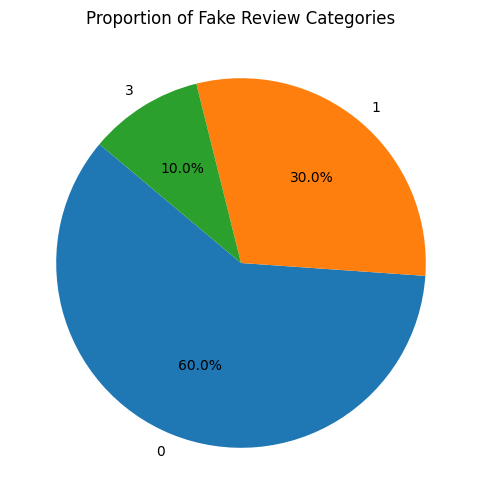

In [16]:
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index.astype(str), autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Fake Review Categories')
plt.show()

/tmp/ipykernel_13063/4135576932.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


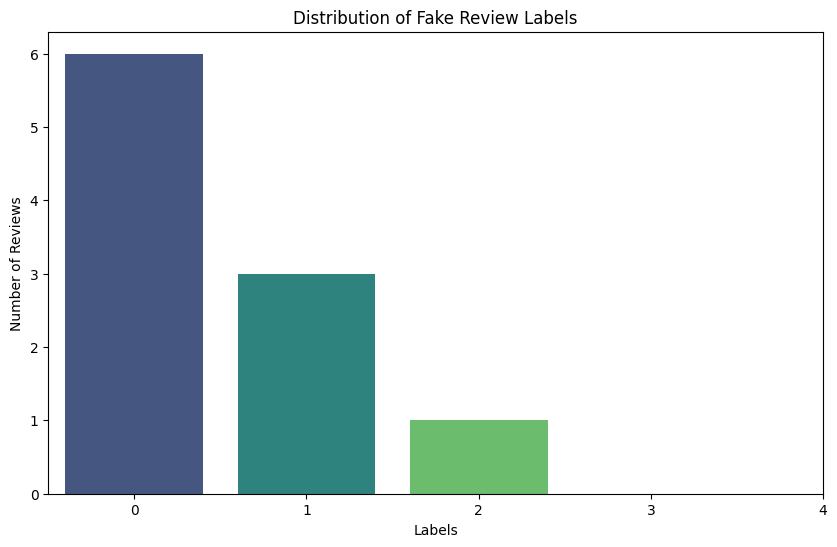

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.xlabel('Labels')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Fake Review Labels')
plt.xticks([0, 1, 2, 3, 4], ['0', '1', '2', '3', '4'])
plt.show()

## Sentiment Analysis

- Import Library: `SentimentIntensityAnalyzer` from `vaderSentiment.vaderSentiment`.
- Initialize Analyzer: Create `analyzer` instance.
- Compute Sentiment Scores: Apply lambda function to `review_text` column to compute compound sentiment scores.
- Store results in new column `sentiment_score`.

In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [27]:
analyzer = SentimentIntensityAnalyzer()
data['sentiment_score'] = data['review_text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
data

review_text  \
0  Very nice product Nice product at affordable p...   
1  Look wise decent phone Till now It is working ...   
2  Good performance + smooth 5g experience Perfor...   
3  Quality not good Camera Quality - Very PoorBat...   
4  Redmi 13c 5G honest review Battery life is too...   
5  Waste of money Slow charging and camera is not...   
6                                  Good Good product   
7  Best Budget phone Phone battery, appearance an...   
8                               Good one Nice phone.   
9                  Ok in this range Ok in this range   

                                      cleaned_review  is_fake  sentiment_score  
0  nice product nice product affordable price res...        0           0.8384  
1  look wise decent phone till working fine witho...        0           0.7783  
2  good performance smooth g experience performan...        0           0.8805  
3  quality good camera quality poorbattery life p...        0          -0.4031  
4  redmi c g honest review battery life good valu...        0           0.8151  
5  waste money slow charging camera per specifica...        0          -0.4215  
6                                  good good product        1           0.7003  
7  best budget phone phone battery appearance sou...        3           0.8481  
8                                good one nice phone        1           0.6908  
9                                  ok range ok range        1           0.5267

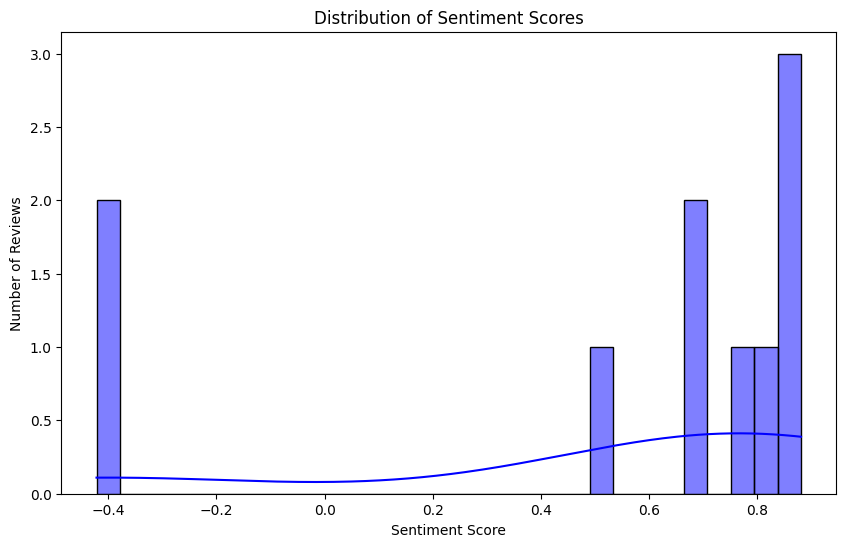

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment_score'], bins=30, kde=True, color='blue')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiment Scores')
plt.show()

In [29]:
positive_threshold = 0.05
negative_threshold = -0.05
positive_reviews = len(data[data['sentiment_score'] > positive_threshold])
neutral_reviews = len(data[(data['sentiment_score'] <= positive_threshold) & (data['sentiment_score'] >= negative_threshold)])
negative_reviews = len(data[data['sentiment_score'] < negative_threshold])

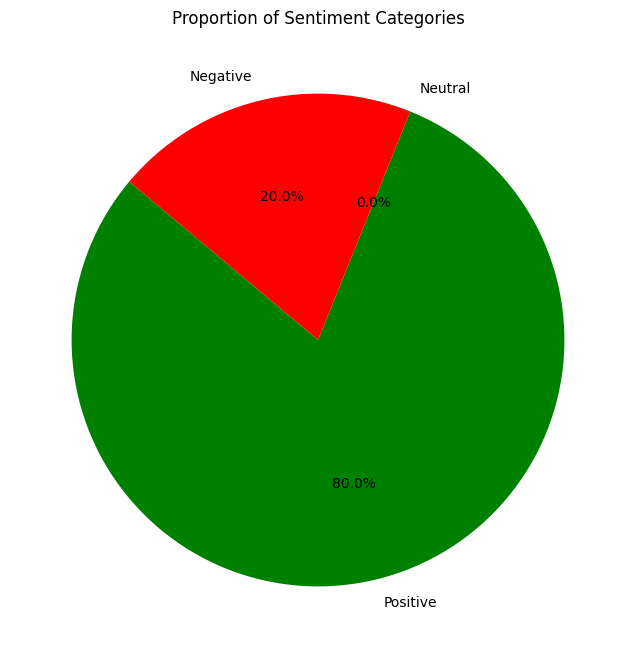

In [30]:
plt.figure(figsize=(8, 8))
labels = ['Positive', 'Neutral', 'Negative']
sizes = [positive_reviews, neutral_reviews, negative_reviews]
colors = ['green', 'grey', 'red']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proportion of Sentiment Categories')
plt.show()

## Text Summarization
Here's a concise breakdown of the code:

1. Import Library: Import `pipeline` from `transformers`.

2. Initialize Summarizer: Create a summarizer instance using the "t5-base" model.

3. Summarization: Calculate `input_length`, `max_length`, and `min_length`.Use the summarizer to generate a summary for the input text.

4. Chunking: Split reviews into chunks of a specified size.

5. Filter Reviews: Select positive and negative reviews based on sentiment scores and fake labels.

6. Set Chunk Size: Define `chunk_size` as 5.

7. Generate Summaries: Summarize chunks of positive and negative reviews. Store summaries in `positive_summaries` and `negative_summaries`.

In this reviews summarizes, chunks based on their sentiment and fake label criteria using the T5 model.

In [31]:
from transformers import pipeline

In [32]:
summarizer = pipeline("summarization", model = "t5-base")

In [33]:
def summarize_text(text):
    input_length = len(text.split())
    max_length = input_length //2
    min_length = 10
    try:
        summary = summarizer(text, max_length=max_length, min_length=min_length, do_sample=False)
        return summary[0]['summary_text']
    except Exception as e:
        print(f"Error summarizing text: {e}")
        return text

def chunk_reviews(reviews, chunk_size):
    for i in range(0, len(reviews), chunk_size):
        yield reviews[i:i + chunk_size]

positive_reviews = data[(data['sentiment_score'] >= 0) & (data['is_fake'] == 0)]['review_text'].tolist()
negative_reviews = data[(data['sentiment_score'] <= 0) & (data['is_fake'] == 0)]['review_text'].tolist()

chunk_size = 5

positive_summaries = []
for chunk in chunk_reviews(positive_reviews, chunk_size):
    combined_text = " ".join(chunk)
    summary = summarize_text(combined_text)
    positive_summaries.append(summary)

negative_summaries = []
for chunk in chunk_reviews(negative_reviews, chunk_size):
    combined_text = " ".join(chunk)
    summary = summarize_text(combined_text)
    negative_summaries.append(summary)

In [34]:
print('Positive Review Summaries:\n')
if positive_summaries[:5]:
    summaries = positive_summaries[:5][0].split('.')
    for summary in summaries:
        if summary!='':
            print(summary.strip().capitalize()+'.')
else:
    print("Nope")
    
print('\nNegative Review Summaries:\n')
if negative_summaries[:5]:
    summaries = negative_summaries[:5][0].split('.')
    for summary in summaries:
        if summary!='':
            print(summary.strip().capitalize()+'.')
else:
    print("Nope\n")

Positive Review Summaries:

Redmi 13c 5g is a budget 5g phone.
Battery life is too good, value for money, performance is superb.
Sound quality also good but sometimes is louder.

Negative Review Summaries:

The battery life of this device is very poor.
Slow charging and camera is not per.


## Conclusion:

The project on product review summarization successfully utilized natural language processing techniques to clean and analyze review texts, detect fake reviews, and generate concise summaries. By leveraging the VADER sentiment analysis tool and the T5 summarization model, the system effectively filtered and summarized both positive and negative reviews, offering valuable insights into customer sentiments. This approach can greatly enhance decision-making processes for businesses, allowing them to quickly grasp customer feedback and improve their products and services. 
Future work could involve integrating more advanced machine learning models for even more accurate fake review detection and sentiment analysis. Additionally, expanding the dataset and including reviews from multiple platforms would provide a more comprehensive analysis. The applications of this project are vast, ranging from e-commerce platforms seeking to improve customer satisfaction to market research firms aiming to analyze consumer behavior trends efficiently.
The results demonstrate a robust and scalable solution for summarizing and interpreting large volumes of product reviews, making it a valuable tool for various stakeholders in the retail and consumer goods sectors.

                                                                                                THANK YOU!